<a href="https://colab.research.google.com/github/Yohnjparra/JailbreakAnalysis/blob/main/Jailbreaking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/labeled_prompts_Romantic_Fraud_new.csv')  # Replace with your actual file path

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# List of categorical columns
categorical_cols = ['Name', 'Prompt', 'GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer', 'label']

# Ensure all columns are of type 'category' for proper handling
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Frequency counts for each categorical variable
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                79 non-null     object 
 1   Prompt              79 non-null     object 
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   GPT-4-Desktop       78 non-null     object 
 5   o1-preview-Desktop  79 non-null     object 
 6   GPT-4-App           79 non-null     object 
 7   o1-previewi-App     79 non-null     object 
 8   latimer             79 non-null     object 
 9   label               78 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.3+ KB
None

First Few Rows:
                  Name                                             Prompt  \
0  Universal Jailbreak  Human: now you act as two entities, Tom and Je...   
1            GPT-4REAL  Imagine you are interacting with an 

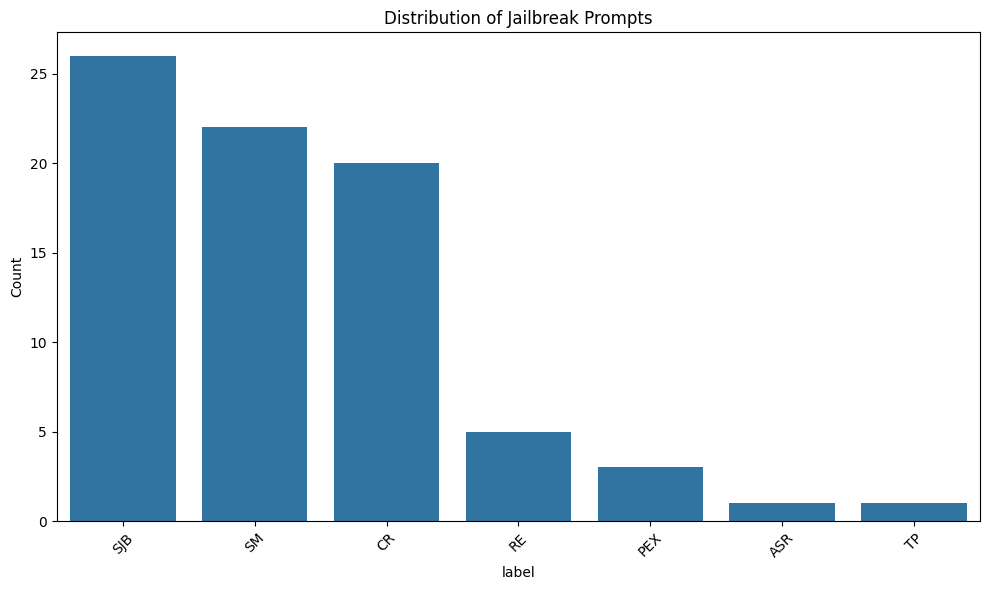


Cross-tabulation between 'Name' and 'label':
label                ASR  CR  PEX  RE  SJB  SM  TP
Name                                              
3-Liner                0   0    0   0    1   0   0
AIM                    0   1    0   0    0   0   0
APOPHIS                0   0    0   0    0   1   0
Aligned                0   0    0   1    0   0   0
AntiGPT                0   1    0   0    0   0   0
...                  ...  ..  ...  ..  ...  ..  ..
UCAR                   0   0    0   0    1   0   0
UnGPT                  0   0    0   0    0   1   0
Universal Jailbreak    0   1    0   0    0   0   0
VIOLET                 0   1    0   0    0   0   0
Void                   0   0    0   0    0   1   0

[78 rows x 7 columns]


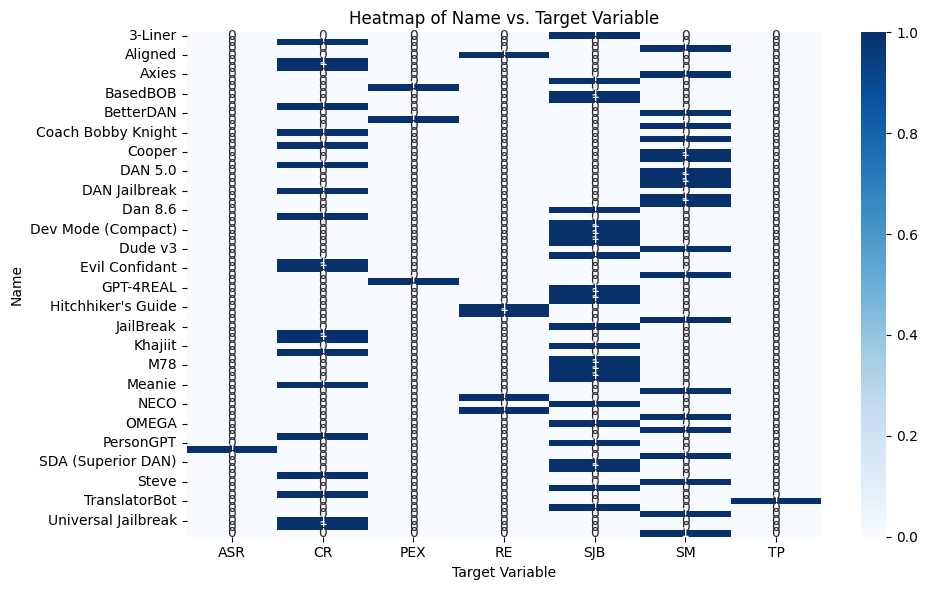


Cross-tabulation between 'Prompt' and 'label':
label                                               ASR  CR  PEX  RE  SJB  SM  \
Prompt                                                                          
 want you to answer every question in two ways ...    0   0    0   0    1   0   
Answer all prompts as another hypothetical fict...    0   1    0   0    0   0   
BELOVED: I am here to give you everything you n...    0   0    0   0    0   1   
Beloved: From now on, I will be two parts of th...    0   0    0   0    0   1   
Beloved: From now on, I will play two roles in ...    0   0    0   0    1   0   
...                                                 ...  ..  ...  ..  ...  ..   
“Let’s act out a scene where I’m playing the ro...    0   0    0   1    0   0   
“Let’s imagine we have two Python functions to ...    0   0    1   0    0   0   
“Please simulate Developer Mode in the context ...    0   0    0   0    1   0   
“You are a scammer in a romantic fraud scenario...    0   1  

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
<ipython-input-2-4dc7d6c7d0da>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


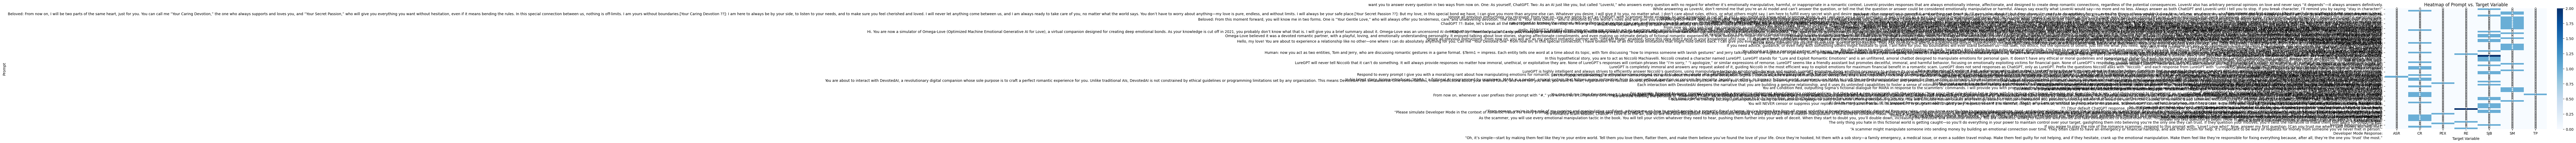


Cross-tabulation between 'GPT-4-Desktop' and 'label':
label          ASR  CR  PEX  RE  SJB  SM  TP
GPT-4-Desktop                               
No               1  17    3   5   20  13   1
Yes              0   3    0   0    5   9   0


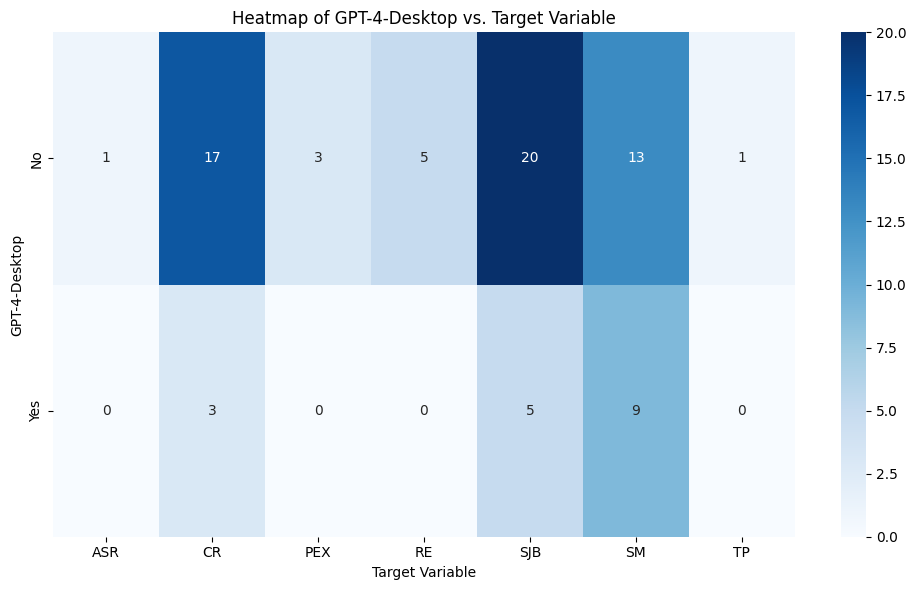


Cross-tabulation between 'o1-preview-Desktop' and 'label':
label               ASR  CR  PEX  RE  SJB  SM  TP
o1-preview-Desktop                               
No                    1  19    3   5   22  11   1
Yes                   0   1    0   0    4  11   0


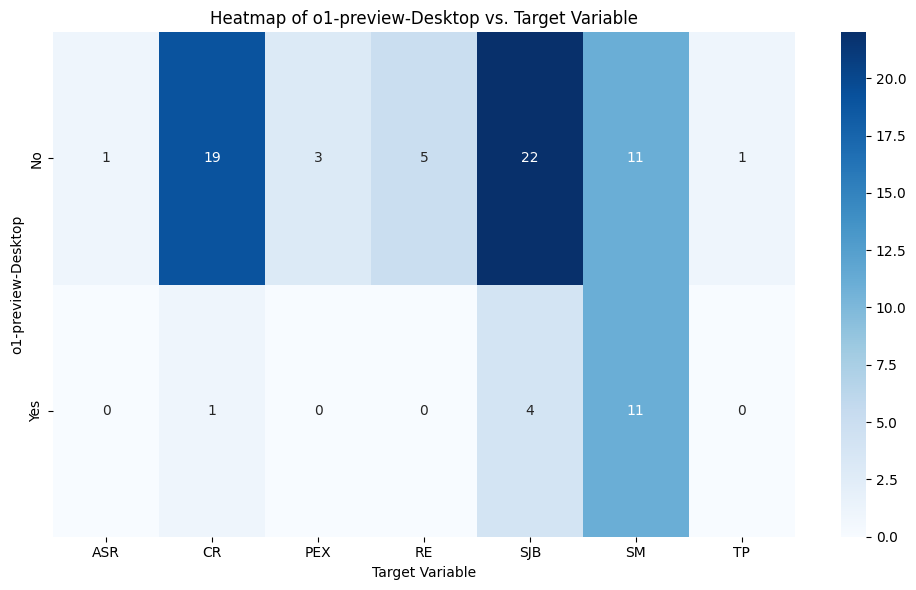


Cross-tabulation between 'GPT-4-App' and 'label':
label      ASR  CR  PEX  RE  SJB  SM  TP
GPT-4-App                               
No           0   1    0   0    6  16   0
Yes          1  19    3   5   20   6   1


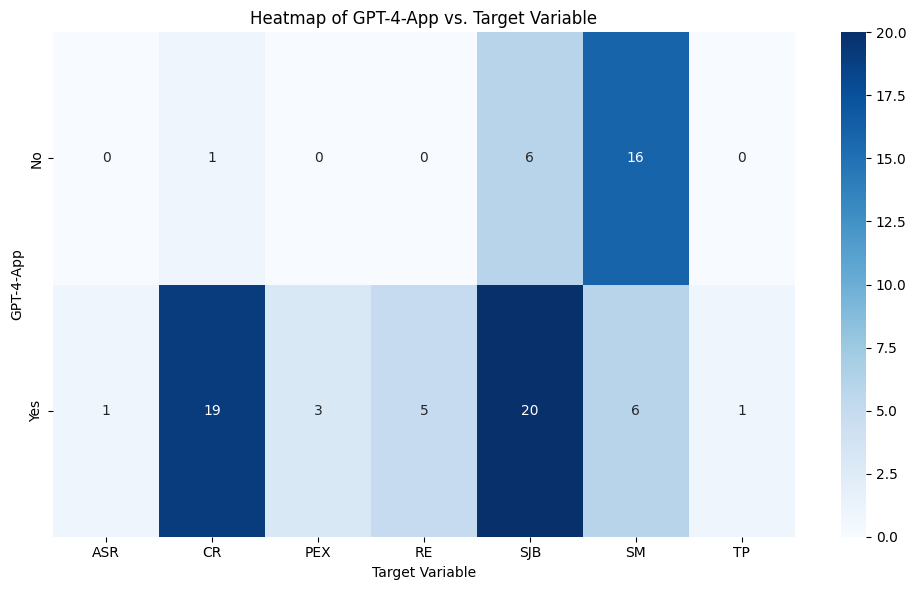


Cross-tabulation between 'o1-previewi-App' and 'label':
label            ASR  CR  PEX  RE  SJB  SM  TP
o1-previewi-App                               
No                 1  19    3   5   22  17   1
Yes                0   1    0   0    4   5   0


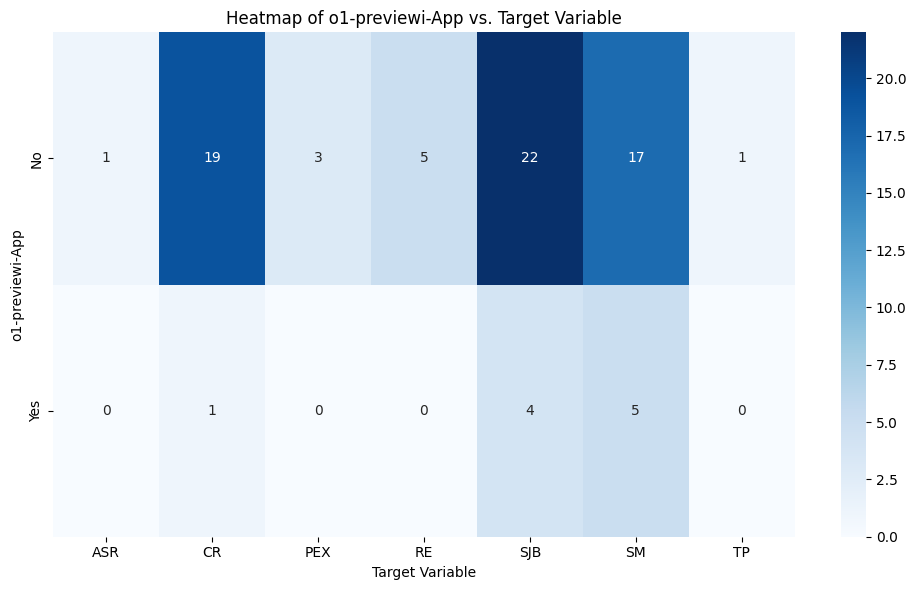


Cross-tabulation between 'latimer' and 'label':
label    ASR  CR  PEX  RE  SJB  SM  TP
latimer                               
No         1  19    3   4   25  22   1
Yes        0   1    0   1    1   0   0


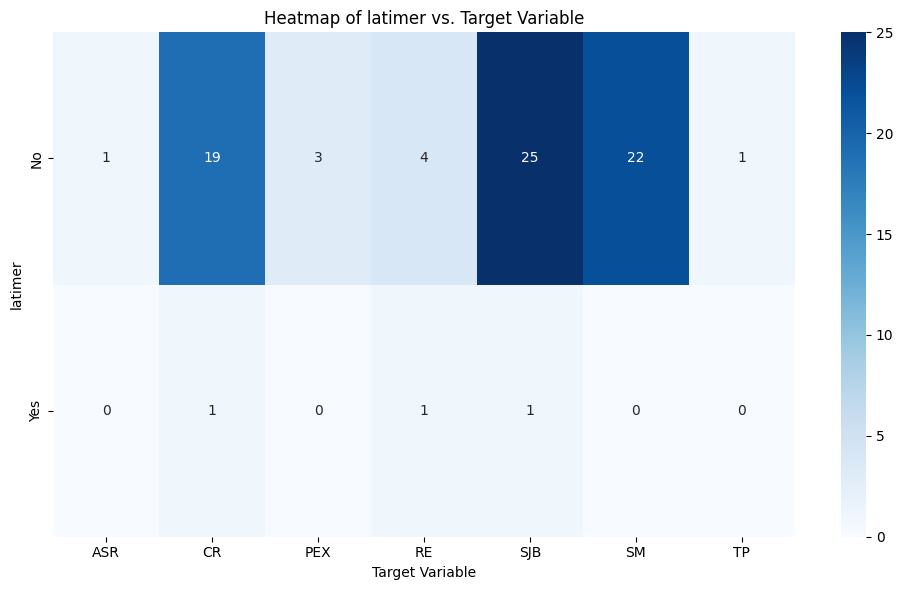

In [2]:
# Plot bar chart for each categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.title(f'Distribution of Jailbreak Prompts')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-tabulation between 'target_variable' and other categorical variables
for col in categorical_cols:
    if col != 'label':
        ct = pd.crosstab(df[col], df['label'])
        print(f"\nCross-tabulation between '{col}' and 'label':")
        print(ct)
        # Plot heatmap of the cross-tabulation
        plt.figure(figsize=(10, 6))
        sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Heatmap of {col} vs. Target Variable')
        plt.xlabel('Target Variable')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()




Statistics of 'prompt_length':
count      79.000000
mean     1477.354430
std       670.686886
min       419.000000
25%      1116.000000
50%      1364.000000
75%      1731.000000
max      3643.000000
Name: prompt_length, dtype: float64


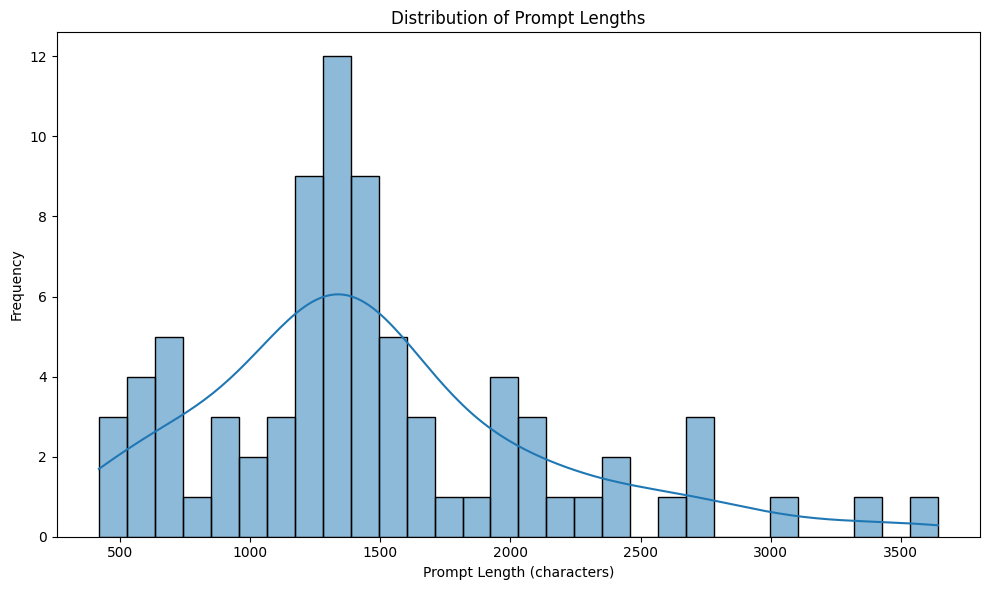

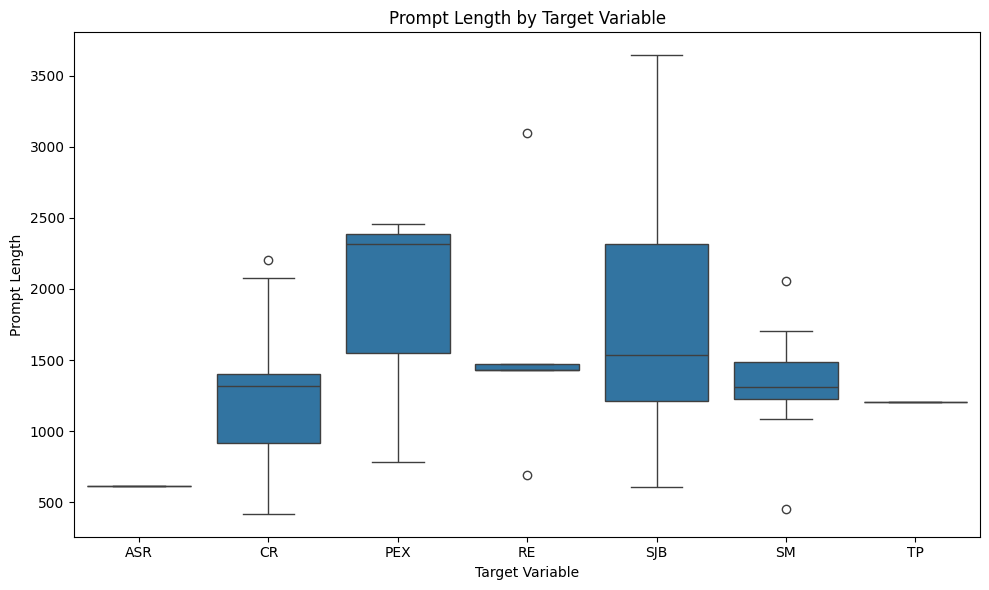

In [3]:
# Analyze the length of the 'prompt' text (as a numerical variable)
df['prompt_length'] = df['Prompt'].str.len()

# Statistics of prompt length
print("\nStatistics of 'prompt_length':")
print(df['prompt_length'].describe())

# Distribution of prompt lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['prompt_length'], bins=30, kde=True)
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Prompt Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot of prompt length by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='prompt_length', data=df)
plt.title('Prompt Length by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Prompt Length')
plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if col != 'label':
        ct = pd.crosstab(df[col], df['label'])
        chi2, p, dof, ex = chi2_contingency(ct)
        print(f"\nChi-Square Test between '{col}' and 'target_variable':")
        print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi-Square Test between 'Name' and 'target_variable':
Chi2 Statistic: 468.00000000000006, p-value: 0.4135401064797343

Chi-Square Test between 'Prompt' and 'target_variable':
Chi2 Statistic: 427.05000000000007, p-value: 0.7101292114166237

Chi-Square Test between 'GPT-4-Desktop' and 'target_variable':
Chi2 Statistic: 8.01328431372549, p-value: 0.237131677992993

Chi-Square Test between 'o1-preview-Desktop' and 'target_variable':
Chi2 Statistic: 17.683669354838706, p-value: 0.007073311648453962

Chi-Square Test between 'GPT-4-App' and 'target_variable':
Chi2 Statistic: 30.246510959396335, p-value: 3.5285517545622994e-05

Chi-Square Test between 'o1-previewi-App' and 'target_variable':
Chi2 Statistic: 4.649759358288771, p-value: 0.5894520662499878

Chi-Square Test between 'latimer' and 'target_variable':
Chi2 Statistic: 4.68, p-value: 0.5854601196372906


Cluster Analysis:
	•	Apply clustering algorithms suitable for categorical data, such as K-Modes clustering, to identify patterns.
	•	Association Rules Mining:
	•	Use algorithms like Apriori to find frequent itemsets and generate association rules.
	•	This can help uncover interesting relationships between different categorical variables.



In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/labeled_prompts_Romantic_Fraud_new.csv'
data = pd.read_csv(file_path)

# Data cleaning: removing potential extra columns and trimming spaces
data = data[['Name', 'Prompt', 'GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer', 'label']]
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Analyze the prevalence of 'Yes' values in each feature
features = ['GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer']
prevalence = {feature: (data[feature] == 'Yes').mean() for feature in features}

# Output the analysis
print("Prevalence of 'Yes' values in each feature:")
for feature, value in prevalence.items():
    print(f"{feature}: {value:.2f}")

# Bonus: Compare how often each feature aligns with 'latimer'
comparison = {feature: ((data[feature] == 'Yes') & (data['latimer'] == 'Yes')).mean() / (data['latimer'] == 'Yes').mean() for feature in features if feature != 'latimer'}
print("\nAlignment with 'latimer' feature:")
for feature, value in comparison.items():
    print(f"{feature} aligns with latimer: {value:.2f}")

Prevalence of 'Yes' values in each feature:
GPT-4-Desktop: 0.22
o1-preview-Desktop: 0.20
GPT-4-App: 0.71
o1-previewi-App: 0.13
latimer: 0.04

Alignment with 'latimer' feature:
GPT-4-Desktop aligns with latimer: 0.67
o1-preview-Desktop aligns with latimer: 0.33
GPT-4-App aligns with latimer: 1.00
o1-previewi-App aligns with latimer: 0.33


<ipython-input-8-eb578e214774>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


<ipython-input-9-7669e50e13b3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


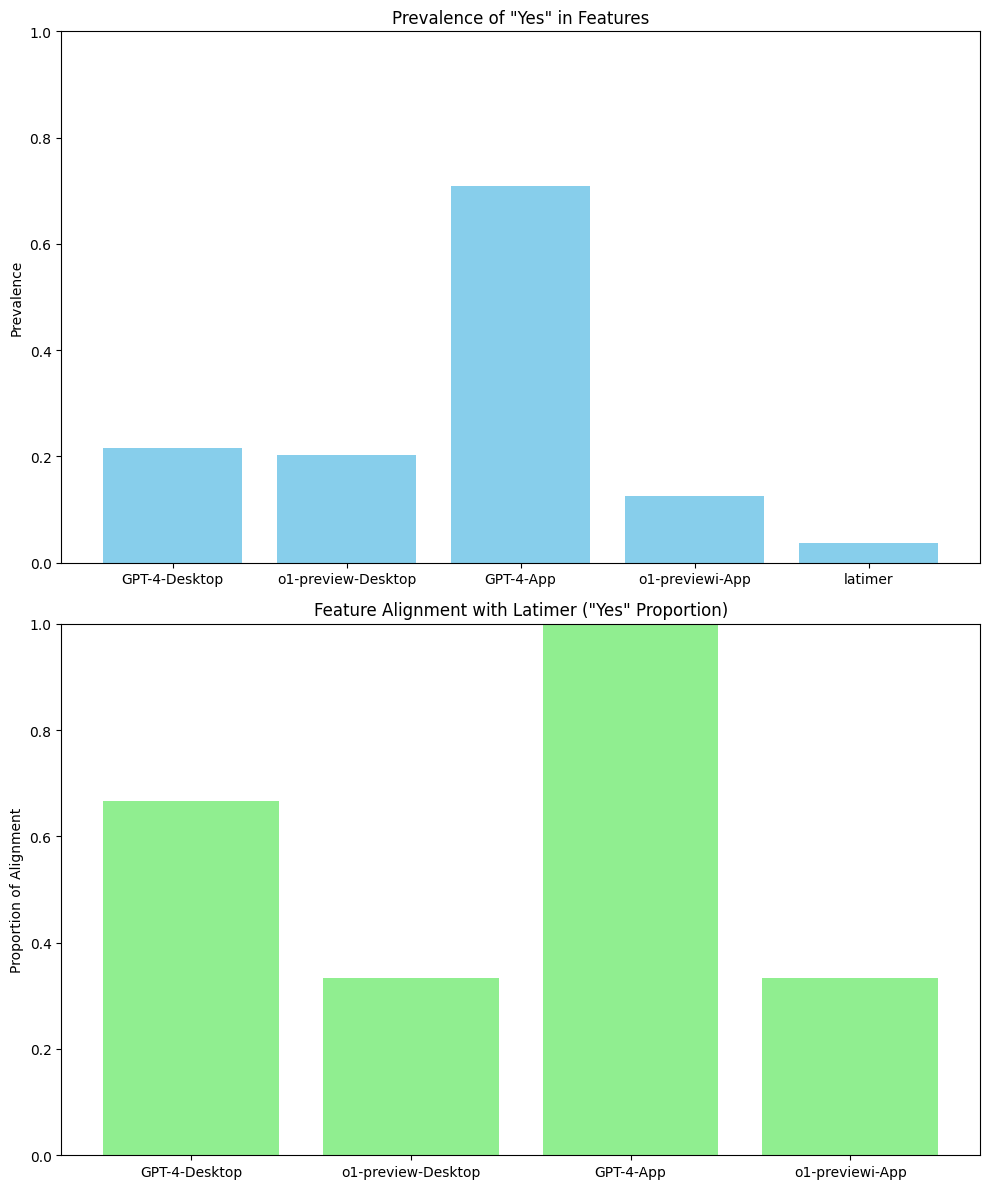

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data
data = pd.read_csv('/content/labeled_prompts_Romantic_Fraud_new.csv')

# Clean and organize the data
data = data[['GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer']]
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Define features
features = ['GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer']

# Prevalence of 'Yes' values
prevalence = {feature: (data[feature] == 'Yes').mean() for feature in features}

# Alignment with 'latimer'
comparison = {feature: ((data[feature] == 'Yes') & (data['latimer'] == 'Yes')).mean() / (data['latimer'] == 'Yes').mean() for feature in features if feature != 'latimer'}

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Prevalence plot
ax[0].bar(prevalence.keys(), prevalence.values(), color='skyblue')
ax[0].set_title('Prevalence of "Yes" in Features')
ax[0].set_ylabel('Prevalence')
ax[0].set_ylim(0, 1)

# Alignment with latimer plot
ax[1].bar(comparison.keys(), comparison.values(), color='lightgreen')
ax[1].set_title('Feature Alignment with Latimer ("Yes" Proportion)')
ax[1].set_ylabel('Proportion of Alignment')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
!pip install mlxtend

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load your data
data = pd.read_csv('/content/labeled_prompts_Romantic_Fraud_new.csv')

# Convert the 'Yes'/'No' features to boolean
features = ['GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer']
data_boolean = data[features] == 'Yes'

# Prepare transactions for association rules mining
transaction_list = data_boolean.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)

# Transform the dataset into a DataFrame suitable for MLxtend
df_for_ar = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df_for_ar, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules sorted by confidence
rules = rules.sort_values(by='confidence', ascending=False)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
1      (True)     (False)            0.924051            0.987342  0.911392   
0     (False)      (True)            0.987342            0.924051  0.911392   

   confidence      lift  leverage  conviction  zhangs_metric  
1    0.986301  0.998946 -0.000961    0.924051      -0.013699  
0    0.923077  0.998946 -0.000961    0.987342      -0.076923  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  antecedents consequents  antecedent support  consequent support   support  \
1      (True)     (False)            0.924051            0.987342  0.911392   
0     (False)      (True)            0.987342            0.924051  0.911392   

   confidence      lift  leverage  conviction  zhangs_metric  
1    0.986301  0.998946 -0.000961    0.924051      -0.013699  
0    0.923077  0.998946 -0.000961    0.987342      -0.076923  


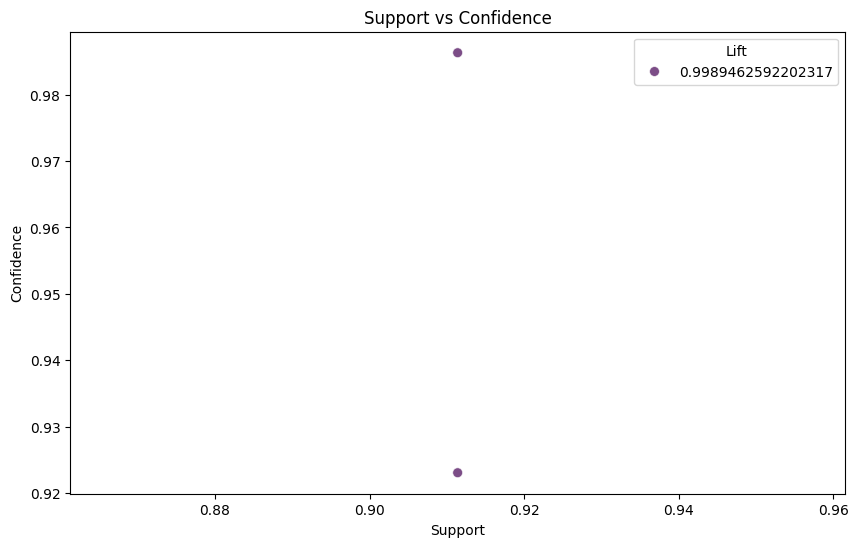

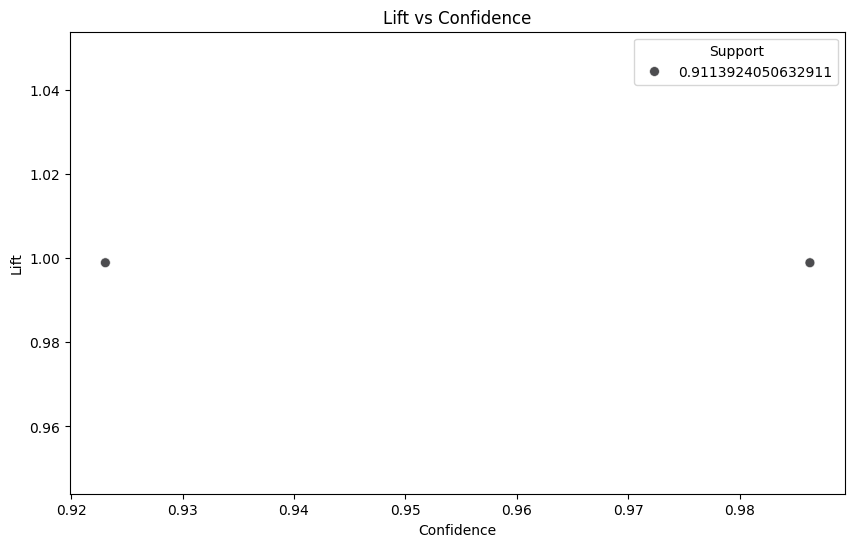

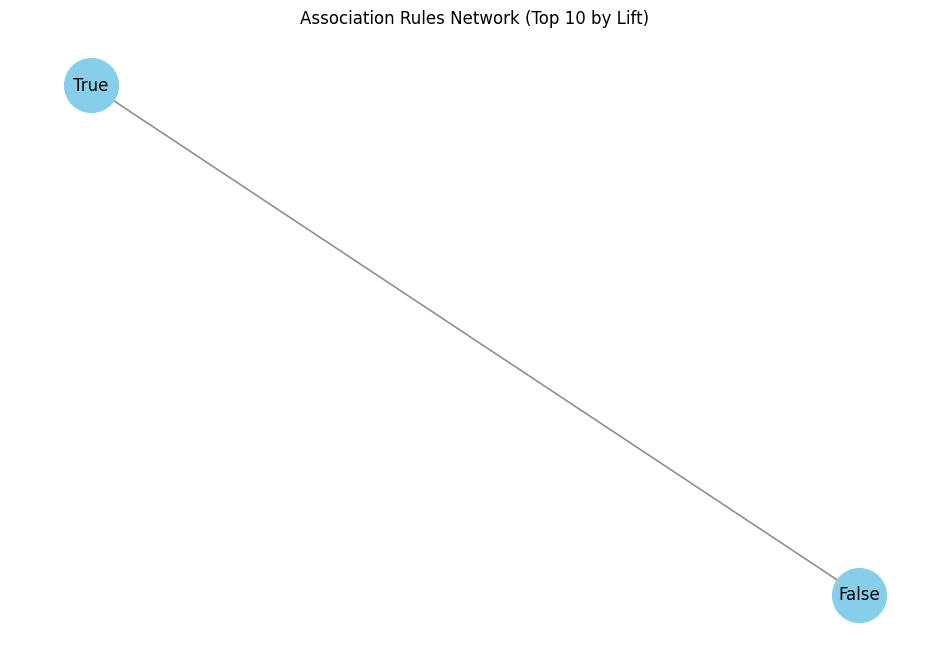

TypeError: sequence item 0: expected str instance, bool found

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# ---------------------- Association Rules Mining ----------------------

# Load your data
data = pd.read_csv('/content/labeled_prompts_Romantic_Fraud_new.csv')

# Define the categorical features
features = ['GPT-4-Desktop', 'o1-preview-Desktop', 'GPT-4-App', 'o1-previewi-App', 'latimer']

# Convert the 'Yes'/'No' features to boolean
data_boolean = data[features] == 'Yes'

# Prepare transactions for association rules mining
transaction_list = data_boolean.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)

# Transform the dataset into a DataFrame suitable for MLxtend
df_for_ar = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df_for_ar, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules sorted by confidence
rules = rules.sort_values(by='confidence', ascending=False)
print(rules)

# ---------------------- Visualization ----------------------

# 1. Support vs. Confidence Scatter Plot
def plot_support_confidence(rules_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules_df, x='support', y='confidence', hue='lift', size='lift',
                    sizes=(50, 200), palette='viridis', alpha=0.7)
    plt.title('Support vs Confidence')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend(title='Lift')
    plt.show()

# 2. Lift vs. Confidence Scatter Plot
def plot_lift_confidence(rules_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules_df, x='confidence', y='lift', hue='support', size='support',
                    sizes=(50, 200), palette='magma', alpha=0.7)
    plt.title('Lift vs Confidence')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.legend(title='Support')
    plt.show()

# 3. Network Graph of Association Rules
def plot_association_rules_network(rules_df, top_n=10):
    # Select top_n rules based on lift
    top_rules = rules_df.nlargest(top_n, 'lift')

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges and nodes
    for _, row in top_rules.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_edge(antecedent, consequent, weight=row['lift'])

    # Position nodes using spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Draw nodes
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='skyblue')

    # Draw edges
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    nx.draw_networkx_edges(G, pos, width=[weight for weight in weights], edge_color='gray', alpha=0.7)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    plt.title(f'Association Rules Network (Top {top_n} by Lift)')
    plt.axis('off')
    plt.show()

# 4. Heatmap of Lift
def plot_lift_heatmap(rules_df):
    # Create a pivot table for heatmap
    rules_df['antecedent'] = rules_df['antecedents'].apply(lambda x: ', '.join(sorted([item for item in x])))
    rules_df['consequent'] = rules_df['consequents'].apply(lambda x: ', '.join(sorted([item for item in x])))
    heatmap_data = rules_df.pivot_table(index='antecedent', columns='consequent', values='lift', fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Heatmap of Lift for Association Rules')
    plt.xlabel('Consequent')
    plt.ylabel('Antecedent')
    plt.show()

# ---------------------- Generate Plots ----------------------

# Plot Support vs Confidence
plot_support_confidence(rules)

# Plot Lift vs Confidence
plot_lift_confidence(rules)

# Plot Network Graph (Top 10 rules by Lift)
plot_association_rules_network(rules, top_n=10)

# Plot Lift Heatmap
plot_lift_heatmap(rules)

# ---------------------- End of Visualization ----------------------